> # **Clean data & data analysis**








> # **Library used**


-   numpy: working with array
-   pandas: data processing with 2-dimentions table
- re: implemnt regular expression to process string
- seaborn, matplotlib: visualization data




In [ ]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

> # **Read the data**

In [ ]:
data = pd.read_csv("Car details v3.csv")
display(data.head(10))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


> # **Explore data analysis**



**1.Overview**






In [ ]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
display(data.describe())
display(data.describe(include = object))

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,8128,8128,8128,8128,8128,7907,7907,7913,7906
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4402,6766,7078,5289,225,1017,377,530






**2. Data transformation. Stage 1**









* Brand







In [ ]:
data['brand'] = [name.split()[0] for name in data['name']]
data['brand'].value_counts()
data =data.drop(columns = 'name', axis = 1)

* Date




In [ ]:
min_date = min(data['year'])
data['date'] = data['year'].apply(lambda year: 2021 - year)
data =data.drop(columns = 'year', axis = 1)


* Owner

In [ ]:
remapped = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 0}
data = data.replace({"owner": remapped})

* Mileage

In [ ]:
data['mileage'] = data['mileage'].str.replace(' kmpl', '')
data['mileage'] = data['mileage'].str.replace(' km/kg', '')
data['mileage'] = data['mileage'].astype(float)

* Engine

In [ ]:
data['engine'] = data['engine'].str.replace(' CC', '')
data['engine'] = data['engine'].astype(float)

* Max power

In [ ]:
data['max_power'] = data['max_power'].str.replace(' bhp', '')
data.loc[data["max_power"]=='', "max_power"]=np.NaN
data['max_power'] = data['max_power'].astype(float)

* Torque

In [ ]:
def torque_parser(torque):
    try:
        torque = torque.lower()
        torque = torque.replace('(', ' ')
        torque = torque.replace(')', ' ')
        torque = torque.replace(',', '')

        # process torque metric
        if 'kgm' in torque:
            torque_inf = re.sub('[a-z]|@', ' ', torque).split()
            torque1 = float(torque_inf[0])
            if torque1 < 100:
                torque_inf[0] = round(torque1 / 0.10197, 1)
        else:
            torque_inf = re.sub('[a-z]|@', ' ', torque).split()

        # process rotational speed metric
        if '-' in torque_inf[1]:
            torque2 = torque_inf[1].split('-')
            mean = (float(torque2[0]) + float(torque2[1])) / 2
            torque_inf[1] = mean

        for i in range(len(torque_inf)):
            torque_inf[i] = float(torque_inf[i])
    except:
        torque_inf = float('nan')

    return torque_inf

torque = data['torque']
data['processedTorque'] = torque.apply(torque_parser)

processedTorque = np.array(data['processedTorque'])

torque1 = np.array([])
rotational_speed = np.array([])
for i in range(len(processedTorque)):
    if type(processedTorque[i]) == float:
      torque1 = np.append(torque1, float('nan'))
      rotational_speed = np.append(rotational_speed, float('nan'))
    else:
      torque1 = np.append(torque1, processedTorque[i][0])
      rotational_speed = np.append(rotational_speed, processedTorque[i][-1])

data['torque'] = torque1
data['rotational_speed'] = rotational_speed

data =data.drop(columns = 'processedTorque', axis = 1)


* Overview after first tranfomation

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     8128 non-null   int64  
 1   km_driven         8128 non-null   int64  
 2   fuel              8128 non-null   object 
 3   seller_type       8128 non-null   object 
 4   transmission      8128 non-null   object 
 5   owner             8128 non-null   int64  
 6   mileage           7907 non-null   float64
 7   engine            7907 non-null   float64
 8   max_power         7912 non-null   float64
 9   torque            7848 non-null   float64
 10  seats             7907 non-null   float64
 11  brand             8128 non-null   object 
 12  date              8128 non-null   int64  
 13  rotational_speed  7848 non-null   float64
dtypes: float64(6), int64(4), object(4)
memory usage: 889.1+ KB


In [ ]:
display(data.describe())
display(data.describe(include = object))

,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,date,rotational_speed
count,8.128000e+03,8.128000e+03,8128.000000,7907.000000,7907.000000,7912.000000,7848.000000,7907.000000,8128.000000,7848.000000
mean,6.382718e+05,6.981951e+04,1.459154,19.418783,1458.625016,91.517919,176.481369,5.416719,7.195989,2889.051160
std,8.062534e+05,5.655055e+04,0.717381,4.037145,503.916303,35.822499,89.656768,0.959588,4.044249,991.822934
min,2.999900e+04,1.000000e+00,0.000000,0.000000,624.000000,0.000000,47.100000,2.000000,1.000000,1300.000000
25%,2.549990e+05,3.500000e+04,1.000000,16.780000,1197.000000,68.050000,111.800000,5.000000,4.000000,2000.000000
50%,4.500000e+05,6.000000e+04,1.000000,19.300000,1248.000000,82.000000,170.000000,5.000000,6.000000,2400.000000
75%,6.750000e+05,9.800000e+04,2.000000,22.320000,1582.000000,102.000000,205.000000,5.000000,10.000000,4000.000000
max,1.000000e+07,2.360457e+06,4.000000,42.000000,3604.000000,400.000000,789.000000,14.000000,38.000000,21800.000000


,fuel,seller_type,transmission,brand
count,8128,8128,8128,8128
unique,4,3,2,32
top,Diesel,Individual,Manual,Maruti
freq,4402,6766,7078,2448


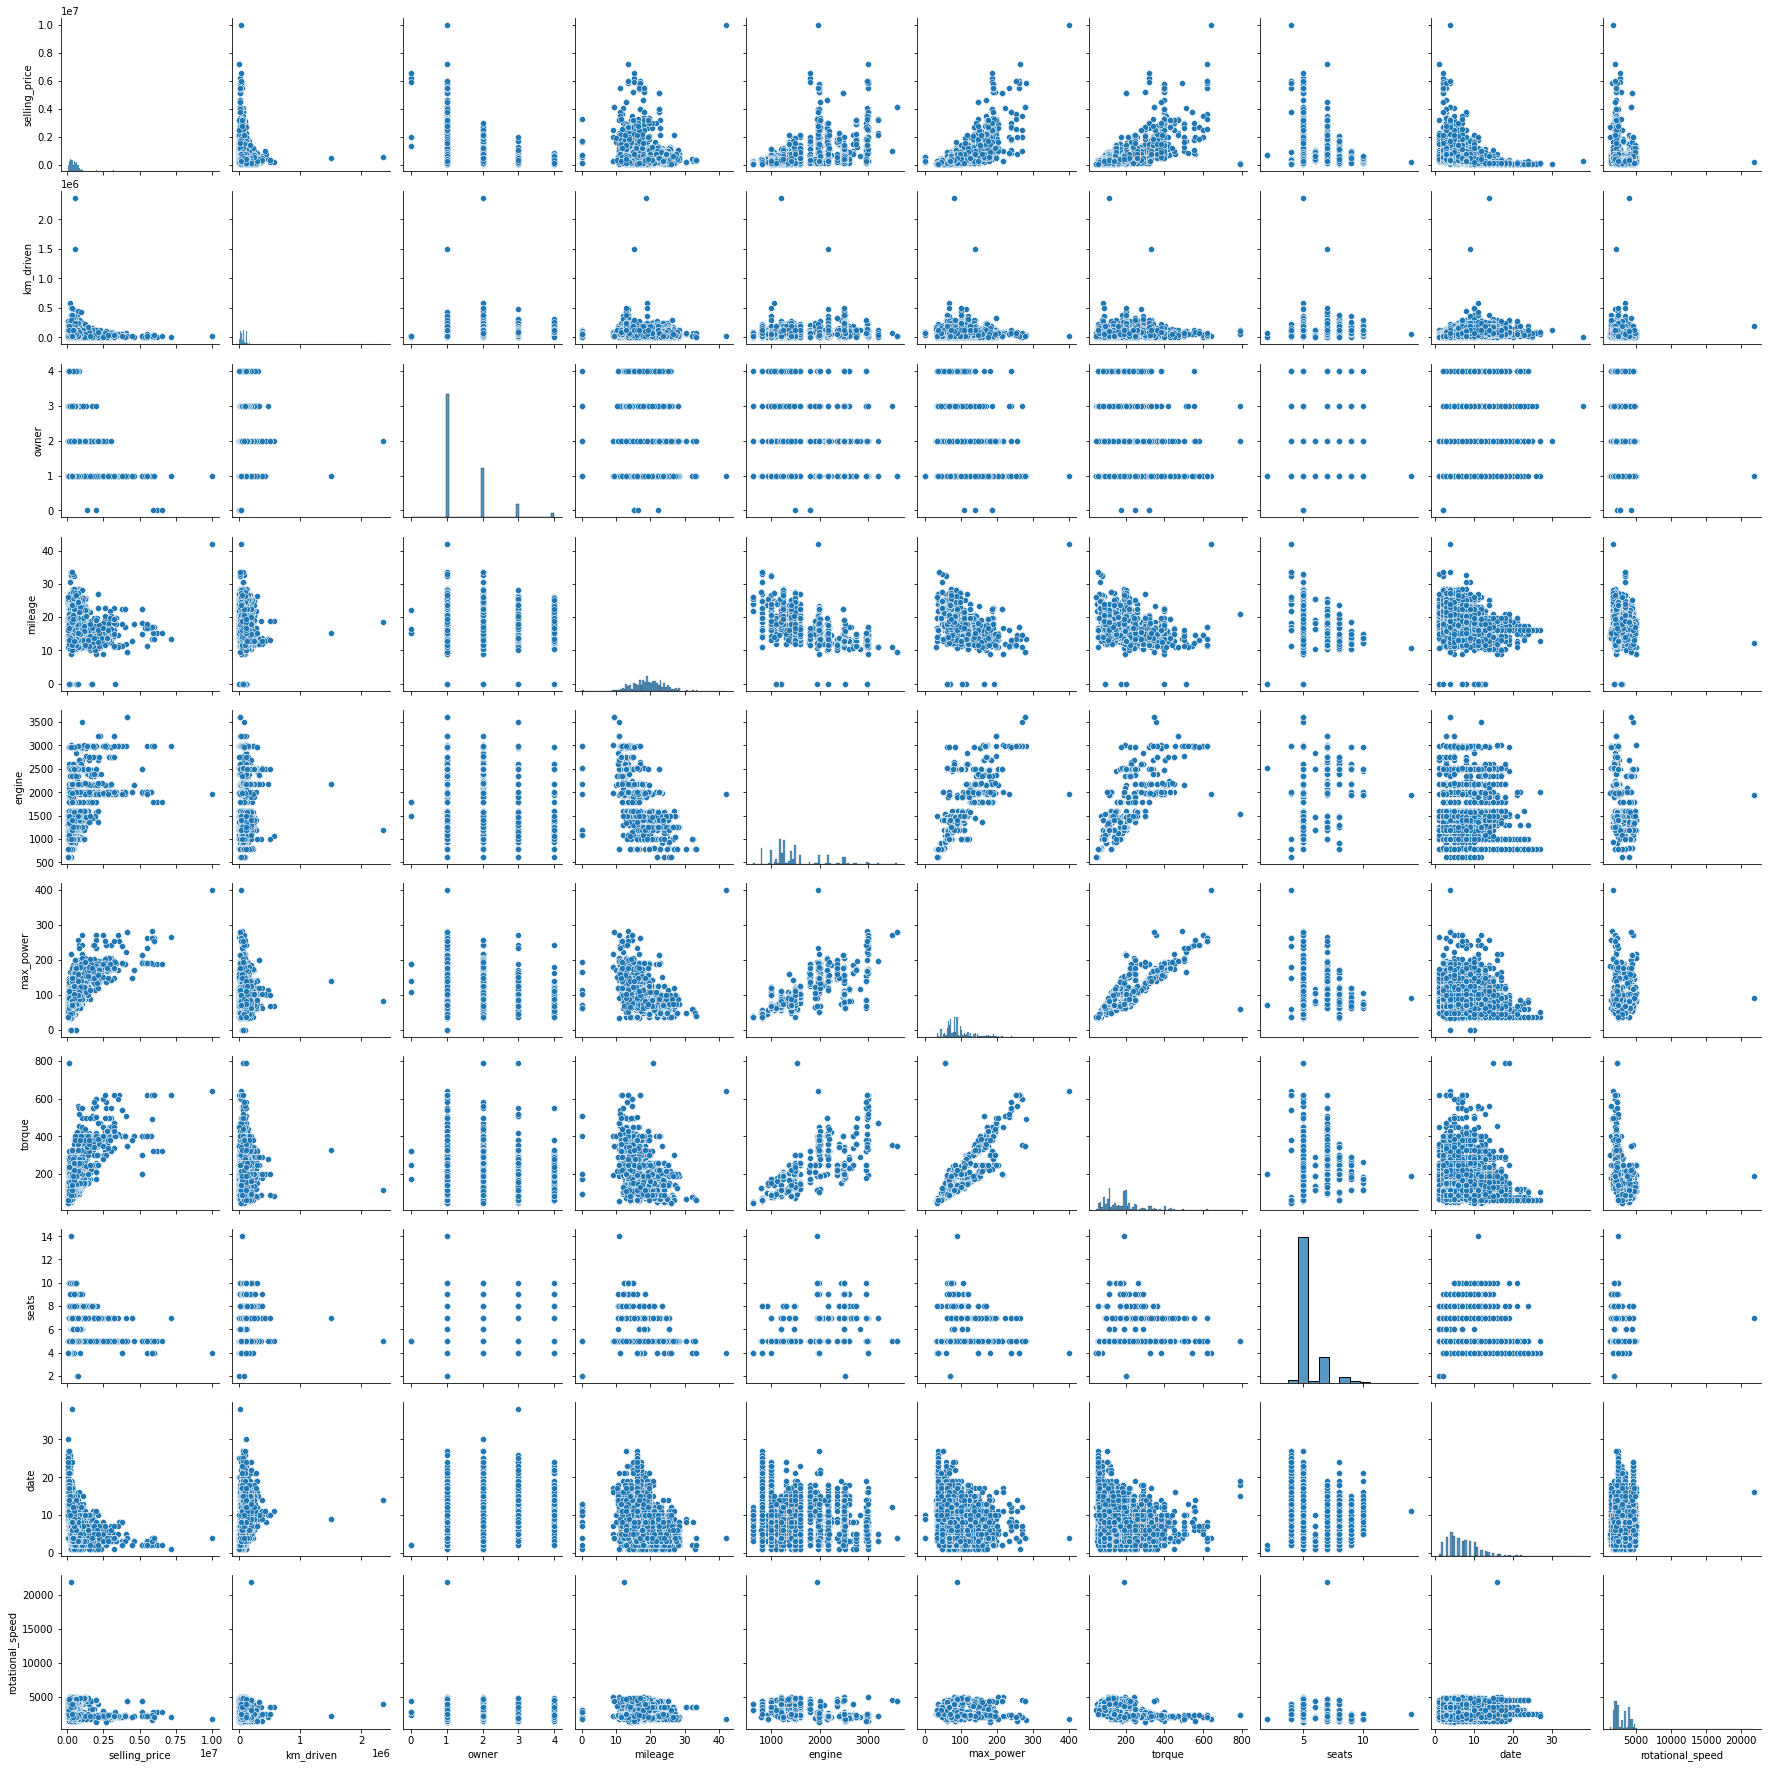

In [ ]:
ax = sns.pairplot(data)



 **Conclusion:**


*   Not all predictors have a linear relationship with the target variable 
*   Zero max_power looks like outliers
*   Zero mileage and mileage > 35 looks like outliers 
*   torque > 700, rotational speed > 10000 look like a bug
*   km_driven > 300000 and km_driven = 1 looks like outliers
* seats = 14 looks like outlier



**3. Data transformation. Stage 2**

* **Dealing with missing values**

In [ ]:
data.isnull().sum()

selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage             221
engine              221
max_power           216
torque              280
seats               221
brand                 0
date                  0
rotational_speed    280
dtype: int64

Although (mileage, engine, max power, torque, seat, rotational speed) are numeric variables, however all of them take rather "discrete" values because they are parameters **attached to the car since it was manufactured**, so it is better to assign them with the **most frequency value(mode) group by "brand"** instead of mean, median group by "brand" or simply their mode, mean, median

In [ ]:
data['mileage'] = data['mileage'].fillna(data.groupby("brand").mileage.value_counts().idxmax()[1])

data['engine'] = data['engine'].fillna(data.groupby("brand").engine.value_counts().idxmax()[1])

data['max_power'] = data['max_power'].fillna(data.groupby("brand").max_power.value_counts().idxmax()[1])

data['torque'] = data['torque'].fillna(data.groupby("brand").torque.value_counts().idxmax()[1])

data['seats'] = data['seats'].fillna(data.groupby("brand").seats.value_counts().idxmax()[1])

data['rotational_speed'] = data['rotational_speed'].fillna(data.groupby("brand").rotational_speed.value_counts().idxmax()[1])


In [ ]:
data.isnull().sum()

selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage             0
engine              0
max_power           0
torque              0
seats               0
brand               0
date                0
rotational_speed    0
dtype: int64

In [ ]:
display(data.describe())
display(data.describe(include = object))

,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,date,rotational_speed
count,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.00000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,6.382718e+05,6.981951e+04,1.459154,19.426430,1452.89813,91.052384,176.947069,5.405389,7.195989,2910.097625
std,8.062534e+05,5.655055e+04,0.717381,3.982138,498.19672,35.455388,88.133253,0.948874,4.044249,980.937159
min,2.999900e+04,1.000000e+00,0.000000,0.000000,624.00000,0.000000,47.100000,2.000000,1.000000,1300.000000
25%,2.549990e+05,3.500000e+04,1.000000,16.800000,1197.00000,68.100000,113.000000,5.000000,4.000000,2037.500000
50%,4.500000e+05,6.000000e+04,1.000000,19.560000,1248.00000,81.860000,180.000000,5.000000,6.000000,2500.000000
75%,6.750000e+05,9.800000e+04,2.000000,22.277500,1582.00000,101.250000,202.000000,5.000000,10.000000,4000.000000
max,1.000000e+07,2.360457e+06,4.000000,42.000000,3604.00000,400.000000,789.000000,14.000000,38.000000,21800.000000


,fuel,seller_type,transmission,brand
count,8128,8128,8128,8128
unique,4,3,2,32
top,Diesel,Individual,Manual,Maruti
freq,4402,6766,7078,2448


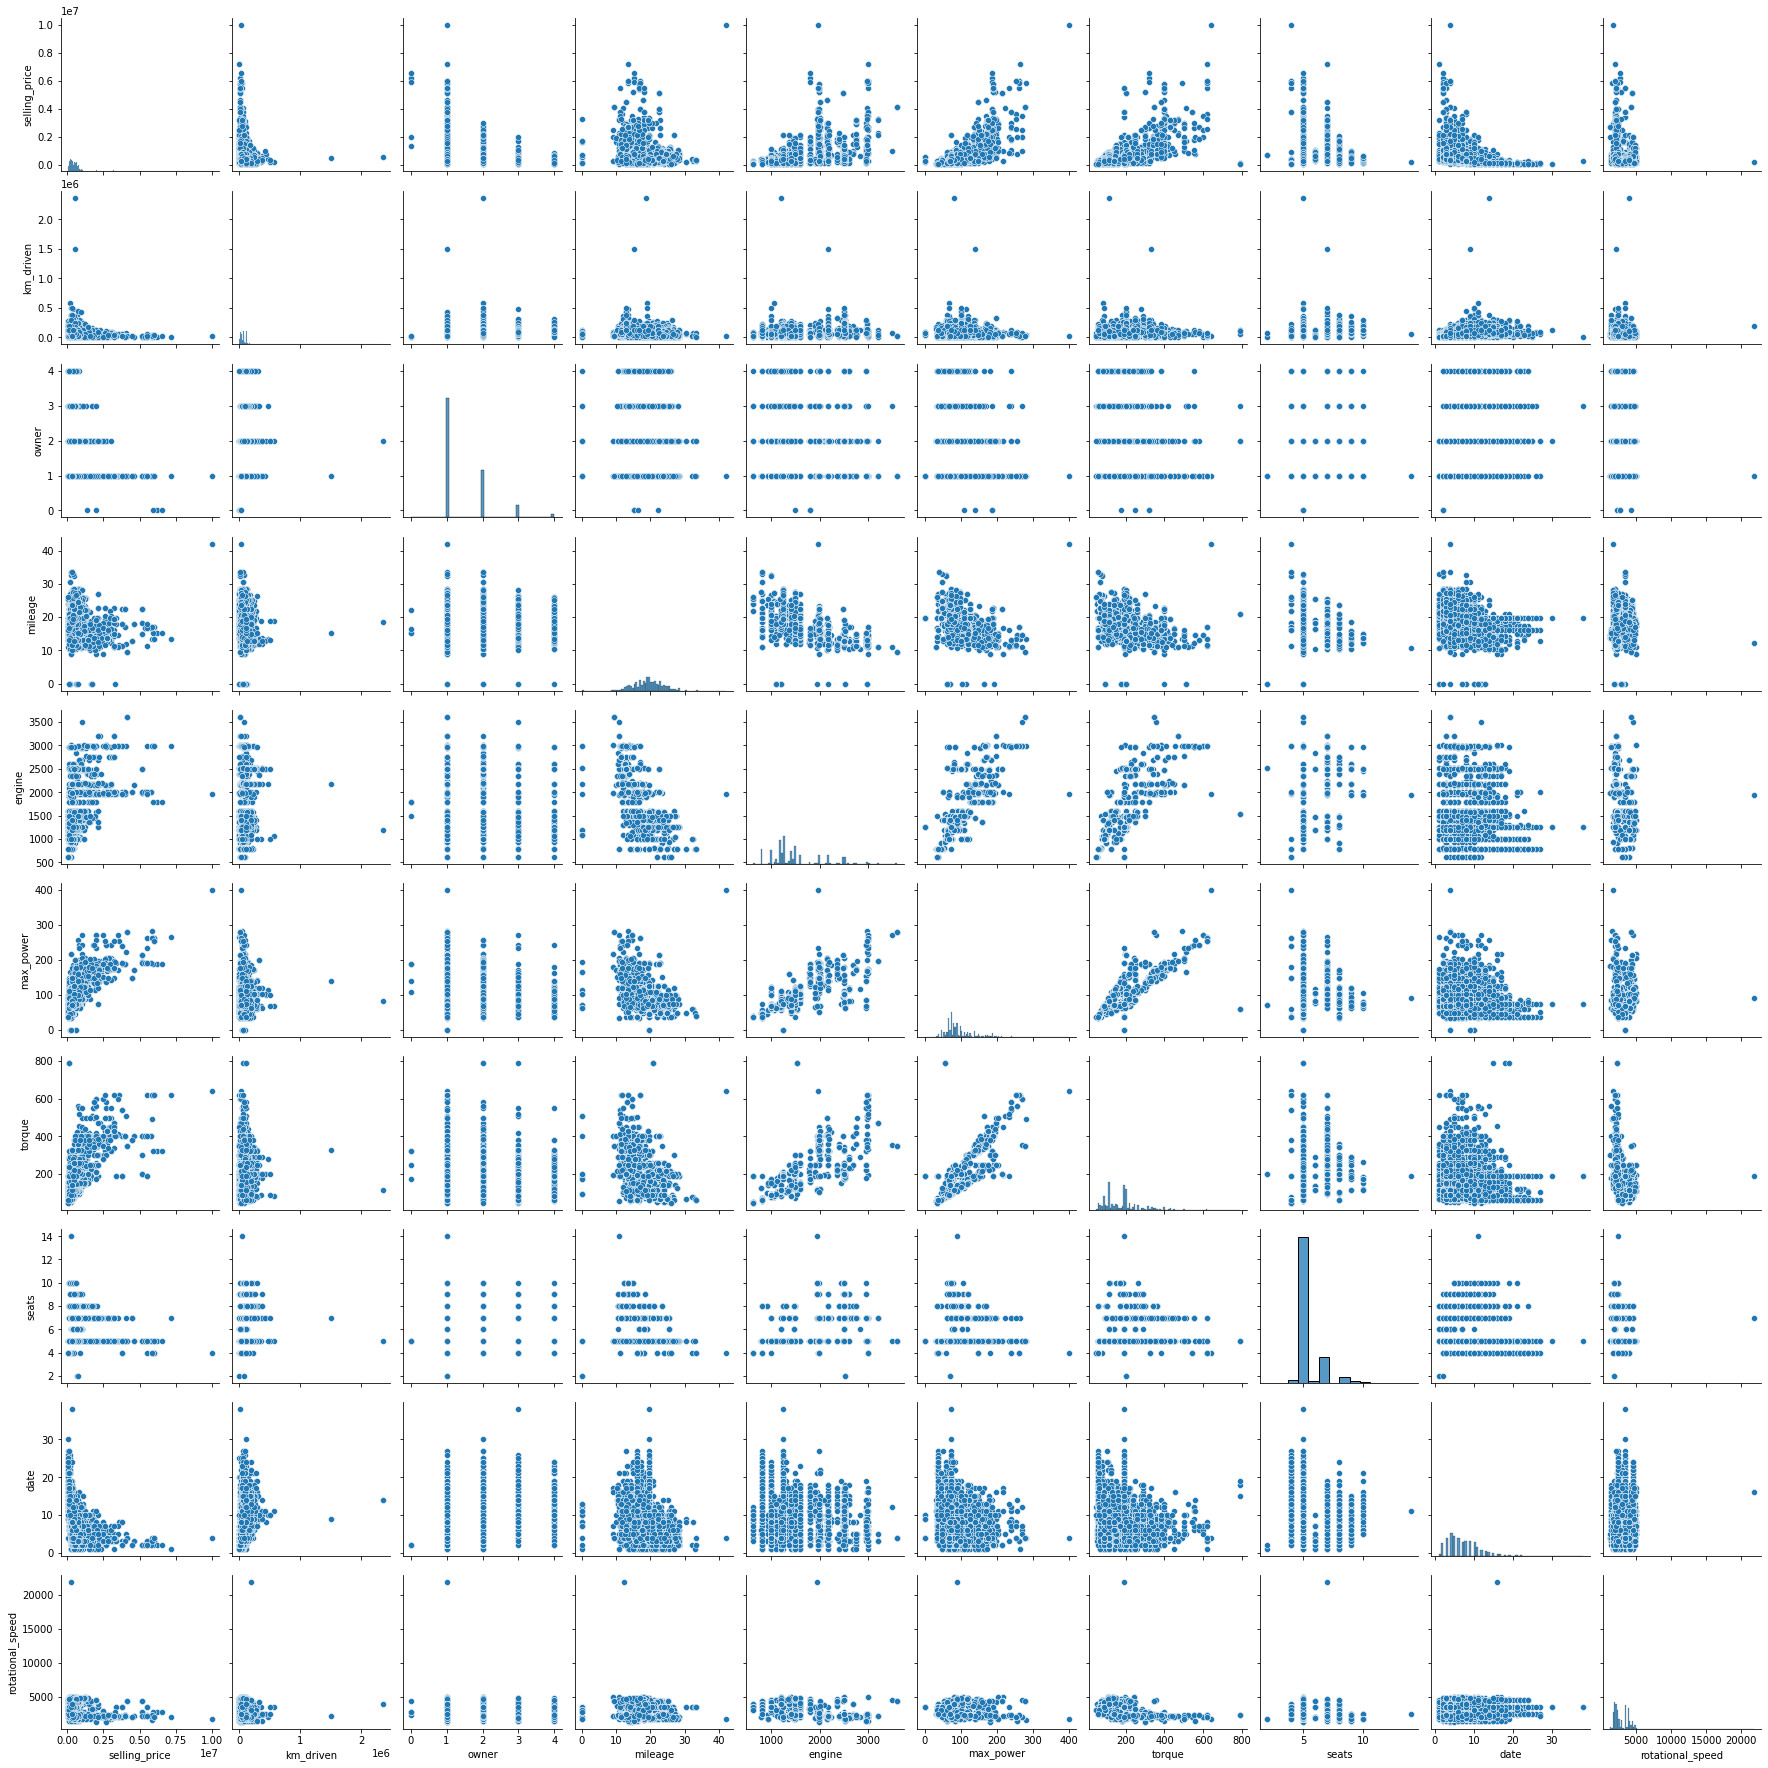

In [ ]:
ax = sns.pairplot(data)

*  **Dealing with numeric features and their outliers**

Drop bad value

In [ ]:
data = data[data["km_driven"] < 300000]
data = data[data["km_driven"] > 1]

data = data[data["mileage"]<35]
data = data[data["mileage"]>0]

data = data[data['max_power']>0]

data = data[data['torque'] < 700]
data = data[data['rotational_speed'] < 10000]

data = data[data['seats'] < 14]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8071 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     8071 non-null   int64  
 1   km_driven         8071 non-null   int64  
 2   fuel              8071 non-null   object 
 3   seller_type       8071 non-null   object 
 4   transmission      8071 non-null   object 
 5   owner             8071 non-null   int64  
 6   mileage           8071 non-null   float64
 7   engine            8071 non-null   float64
 8   max_power         8071 non-null   float64
 9   torque            8071 non-null   float64
 10  seats             8071 non-null   float64
 11  brand             8071 non-null   object 
 12  date              8071 non-null   int64  
 13  rotational_speed  8071 non-null   float64
dtypes: float64(6), int64(4), object(4)
memory usage: 945.8+ KB


In [ ]:
display(data.describe())

,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,date,rotational_speed
count,8.071000e+03,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,6.382237e+05,68450.051419,1.456945,19.482630,1450.104200,91.058933,176.536870,5.402057,7.176558,2909.295440
std,8.010373e+05,44966.523539,0.715451,3.870093,495.851025,35.203751,87.157852,0.939715,4.041228,959.710816
min,2.999900e+04,1000.000000,0.000000,9.000000,624.000000,32.800000,47.100000,4.000000,1.000000,1300.000000
25%,2.549990e+05,35000.000000,1.000000,16.800000,1197.000000,69.000000,113.000000,5.000000,4.000000,2000.000000
50%,4.500000e+05,60000.000000,1.000000,19.620000,1248.000000,81.860000,180.000000,5.000000,6.000000,2500.000000
75%,6.750000e+05,96357.500000,2.000000,22.300000,1582.000000,100.600000,202.000000,5.000000,10.000000,4000.000000
max,7.200000e+06,298000.000000,4.000000,33.440000,3604.000000,282.000000,620.000000,10.000000,38.000000,5000.000000


* **Dealing with nominal features**

Fuel unique values

In [ ]:
data['fuel'].value_counts()

Diesel    4367
Petrol    3611
CNG         56
LPG         37
Name: fuel, dtype: int64

Seller type unique values

In [ ]:
data['seller_type'].value_counts()

Individual          6715
Dealer              1120
Trustmark Dealer     236
Name: seller_type, dtype: int64

Tranmission unique values

In [ ]:
data['transmission'].value_counts()

Manual       7028
Automatic    1043
Name: transmission, dtype: int64

Owner unique values

In [ ]:
data['owner'].value_counts()

1    5261
2    2088
3     546
4     171
0       5
Name: owner, dtype: int64

Brand unique values

In [ ]:
data['brand'].value_counts()

Maruti           2436
Hyundai          1404
Mahindra          760
Tata              728
Toyota            479
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        184
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              66
Datsun             65
Mercedes-Benz      51
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                5
Isuzu               5
Ambassador          4
Kia                 4
MG                  3
Daewoo              3
Peugeot             1
Opel                1
Ashok               1
Name: brand, dtype: int64

Although seats is numeric feature, but it is very very discrete, so it can be considered as a "ordinal" feature. Seats unique value

In [ ]:
data['seats'].value_counts()

5.0     6442
7.0     1107
8.0      230
4.0      132
9.0       79
6.0       62
10.0      19
Name: seats, dtype: int64

=> **Conclusion:** 
- Nominal variables (brand, owner) have very, very low frequency compared to the population. It may have a large impact on model performance because of the train, validation, test set split process.
- Because of the linear model is very sensitive with outlier, noise. So these "bad" values shoud be dropped



Drop low frequency value

In [ ]:
threshold = 10

brand_counts = data['brand'].value_counts()
brand_to_remove = brand_counts[brand_counts <= threshold].index
data.replace(brand_to_remove, np.nan, inplace=True)
data = data.drop(data[data['brand'].isna()].index)

owner_counts = data['owner'].value_counts()
owner_to_remove = owner_counts[owner_counts <= threshold].index
data.replace(owner_to_remove, np.nan, inplace=True)
data = data.drop(data[data['owner'].isna()].index)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     8033 non-null   int64  
 1   km_driven         8033 non-null   int64  
 2   fuel              8033 non-null   object 
 3   seller_type       8033 non-null   object 
 4   transmission      8033 non-null   object 
 5   owner             8033 non-null   float64
 6   mileage           8033 non-null   float64
 7   engine            8033 non-null   float64
 8   max_power         8033 non-null   float64
 9   torque            8033 non-null   float64
 10  seats             8033 non-null   float64
 11  brand             8033 non-null   object 
 12  date              8033 non-null   int64  
 13  rotational_speed  8033 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 941.4+ KB


In [ ]:
display(data.describe())
display(data.describe(include = object))

,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,date,rotational_speed
count,8.033000e+03,8033.000000,8033.000000,8033.000000,8033.000000,8033.000000,8033.000000,8033.000000,8033.000000,8033.000000
mean,6.325818e+05,68541.463712,1.457986,19.501171,1448.088385,90.929891,176.177167,5.400847,7.177518,2911.580169
std,7.888543e+05,44926.169034,0.714818,3.865280,494.655557,35.098300,86.916835,0.939351,4.014057,960.646504
min,2.999900e+04,1000.000000,1.000000,9.000000,624.000000,32.800000,47.100000,4.000000,1.000000,1300.000000
25%,2.549990e+05,35000.000000,1.000000,16.800000,1197.000000,69.000000,113.000000,5.000000,4.000000,2000.000000
50%,4.500000e+05,60000.000000,1.000000,19.670000,1248.000000,81.860000,176.500000,5.000000,6.000000,2500.000000
75%,6.750000e+05,96500.000000,2.000000,22.320000,1499.000000,100.600000,202.000000,5.000000,10.000000,4000.000000
max,7.200000e+06,298000.000000,4.000000,33.440000,3604.000000,282.000000,620.000000,10.000000,38.000000,5000.000000


,fuel,seller_type,transmission,brand
count,8033,8033,8033,8033
unique,4,3,2,22
top,Diesel,Individual,Manual,Maruti
freq,4340,6694,7009,2436


* **Pairplot**

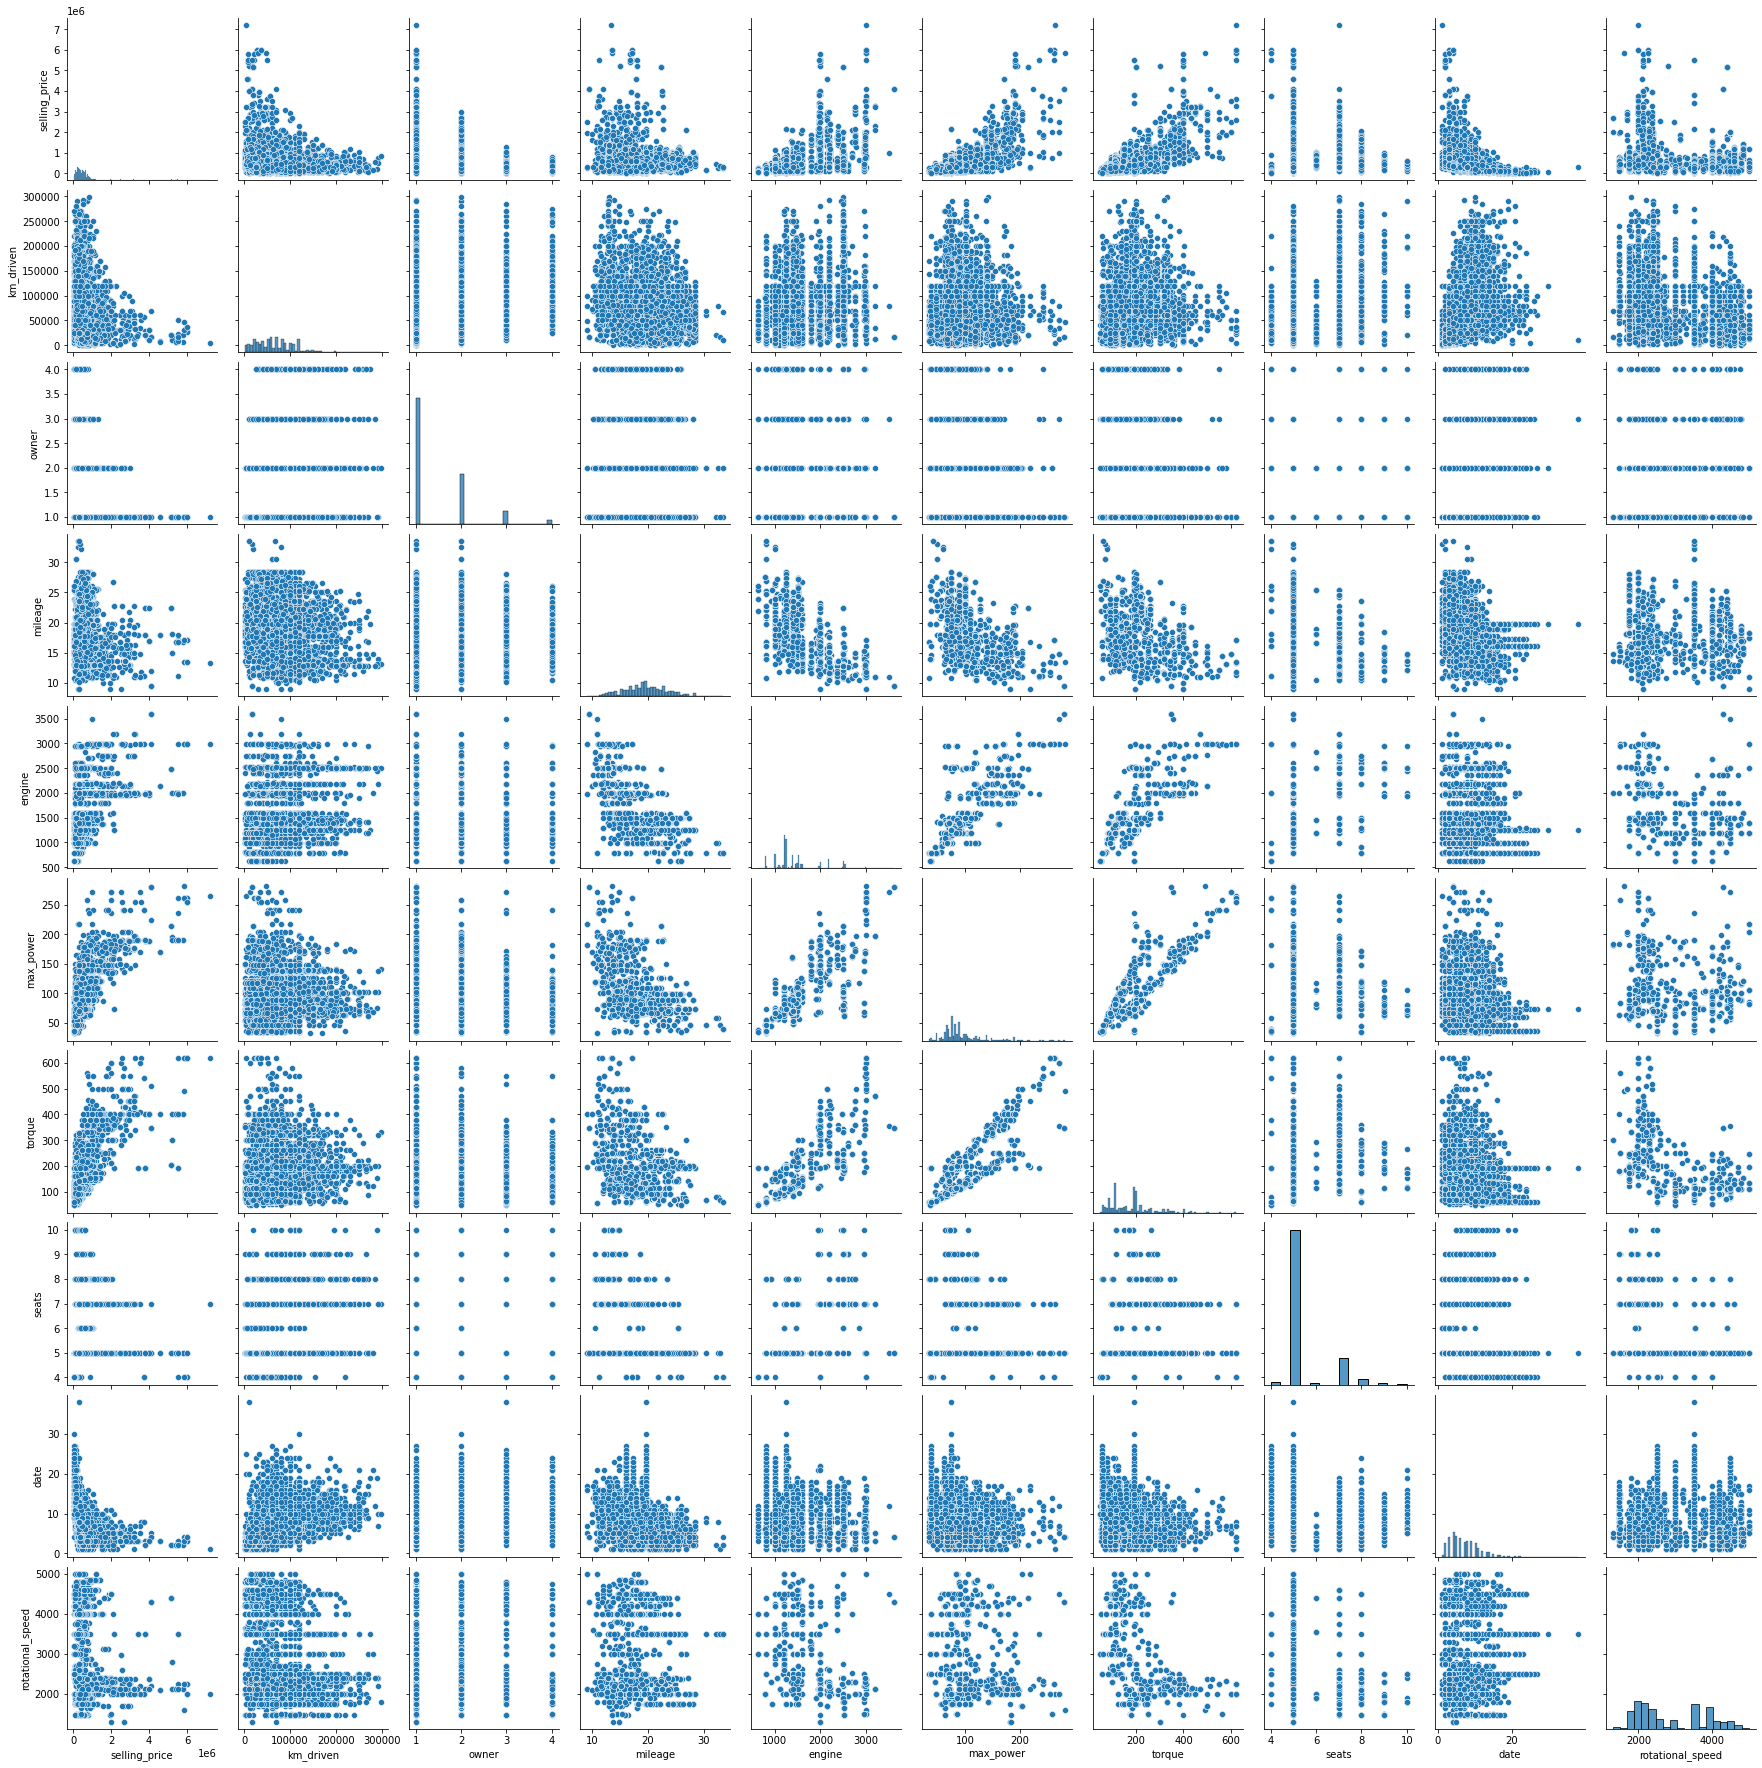

In [ ]:
ax = sns.pairplot(data)

> # **Data visualization with Target variable**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


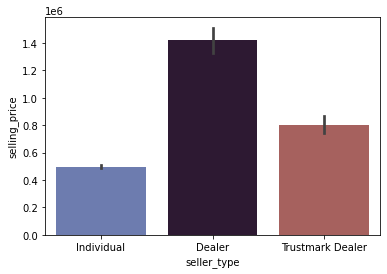

In [ ]:
sns.barplot('seller_type','selling_price',data=data,palette='twilight')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


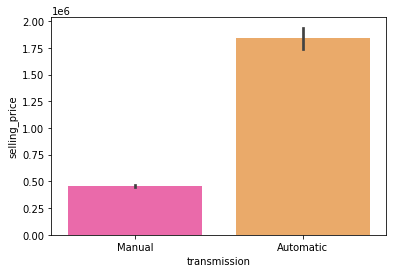

In [ ]:
sns.barplot('transmission','selling_price',data=data,palette='spring')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


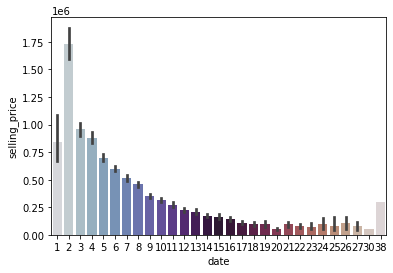

In [ ]:
sns.barplot('date','selling_price',data=data,palette='twilight')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


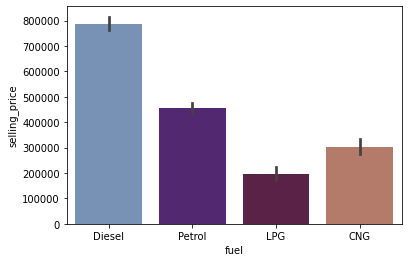

In [ ]:
sns.barplot('fuel','selling_price',data=data,palette='twilight')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


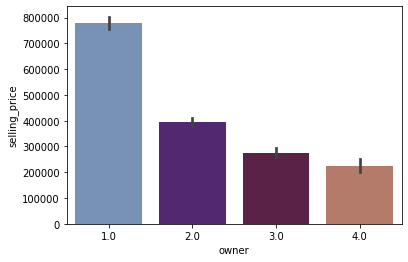

In [ ]:
sns.barplot('owner','selling_price',data=data,palette='twilight')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


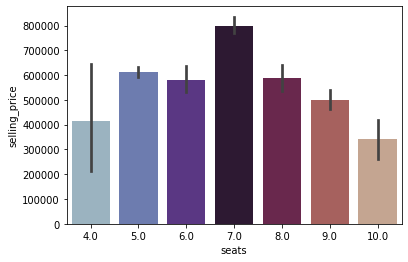

In [ ]:
sns.barplot('seats','selling_price',data=data,palette='twilight')

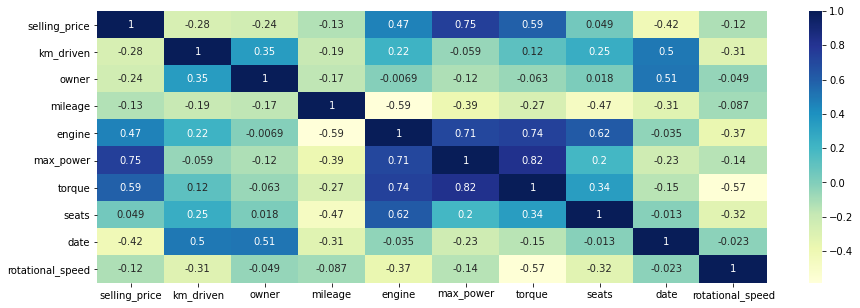

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
corr = data.corr()
ax = sns.heatmap(corr, annot=True, ax=ax, cmap="YlGnBu")

=> **Conclusion**
- Correlation matrix does not show strong linear relationship between predictors

In [ ]:
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     8033 non-null   int64  
 1   km_driven         8033 non-null   int64  
 2   fuel              8033 non-null   object 
 3   seller_type       8033 non-null   object 
 4   transmission      8033 non-null   object 
 5   owner             8033 non-null   float64
 6   mileage           8033 non-null   float64
 7   engine            8033 non-null   float64
 8   max_power         8033 non-null   float64
 9   torque            8033 non-null   float64
 10  seats             8033 non-null   float64
 11  brand             8033 non-null   object 
 12  date              8033 non-null   int64  
 13  rotational_speed  8033 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 1.2+ MB


> # **Export cleaned data**

In [ ]:
data.to_csv("Cleaned data.csv", index = False, header=True)